# Cochrane dataset

https://huggingface.co/datasets/GEM/cochrane-simplification?row=0

In [1]:
from datasets import load_dataset

ds = load_dataset("GEM/cochrane-simplification")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'],
        num_rows: 3568
    })
    validation: Dataset({
        features: ['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'],
        num_rows: 411
    })
    test: Dataset({
        features: ['gem_id', 'gem_parent_id', 'source', 'target', 'doi', 'references'],
        num_rows: 480
    })
})

In [3]:
import difflib
from IPython.display import display, HTML

def highlight_diff(sentence1, sentence2):
    diff = difflib.ndiff(sentence1, sentence2)
    highlighted = []
    
    for char in diff:
        if char.startswith('-'):
            highlighted.append(f"<span style='color:red'>{char[2:]}</span>")
        elif char.startswith('+'):
            highlighted.append(f"<span style='color:green'>{char[2:]}</span>")
        else:
            highlighted.append(char[2:])
    
    return ''.join(highlighted)

In [4]:
import random 
from IPython.display import display, HTML

sample = random.choice(ds['train'])
print("Source:")
print(sample['source'], end='\n\n')
print("Raw: ")
print(sample['target'], end='\n\n')
print("Simplified: ")
print(sample['references'][0], end='\n\n')
print(sample['doi'])

Source:
We included 34 studies evaluating 1614 women and approximately 2396 groins. The overall methodological quality of included studies was moderate. The studies included in this review used the following traceable techniques to identify sentinel nodes in their participants: blue dye only (three studies), technetium only (eight studies), blue dye plus technetium combined (combined tests; 13 studies) and various inconsistent combinations of these three techniques (mixed tests; 10 studies). For studies of mixed tests, we obtained separate test data where possible. Most studies used haematoxylin and eosin (H&E) stains for the histological examination. Additionally an immunohistochemical (IHC) stain with and without ultrastaging was employed by 14 and eight studies, respectively. One study used reverse transcriptase polymerase chain reaction analysis (CA9 RT-PCR), whilst three studies did not describe the histological methods used. The pooled sensitivity estimate for studies using blue 

# Check number of references per sentence

In [12]:
def find_multiple_references(dataset):
    indices_with_multiple_references = []
    count = 0
    for i, example in enumerate(dataset):
        if len(example['references']) > 1:
            indices_with_multiple_references.append(i)
            count += 1

    return count, indices_with_multiple_references

train_count, train_indices = find_multiple_references(ds['train'])
val_count, val_indices = find_multiple_references(ds['validation'])
test_count, test_indices = find_multiple_references(ds['test'])

print(f"Train dataset: {train_count} texts with more than one reference")
print(f"Validation dataset: {val_count} texts with more than one reference")
print(f"Test dataset: {test_count} texts with more than one reference")

Train dataset: 0 texts with more than one reference
Validation dataset: 0 texts with more than one reference
Test dataset: 0 texts with more than one reference


# Text lengths

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def get_text_lengths(dataset, column_name):
    return [len(text.split()) for text in dataset[column_name]]

# get text lengths for each split
train_normal_lengths = get_text_lengths(ds['train'], 'target')
val_normal_lengths = get_text_lengths(ds['validation'], 'target')
test_normal_lengths = get_text_lengths(ds['test'], 'target')

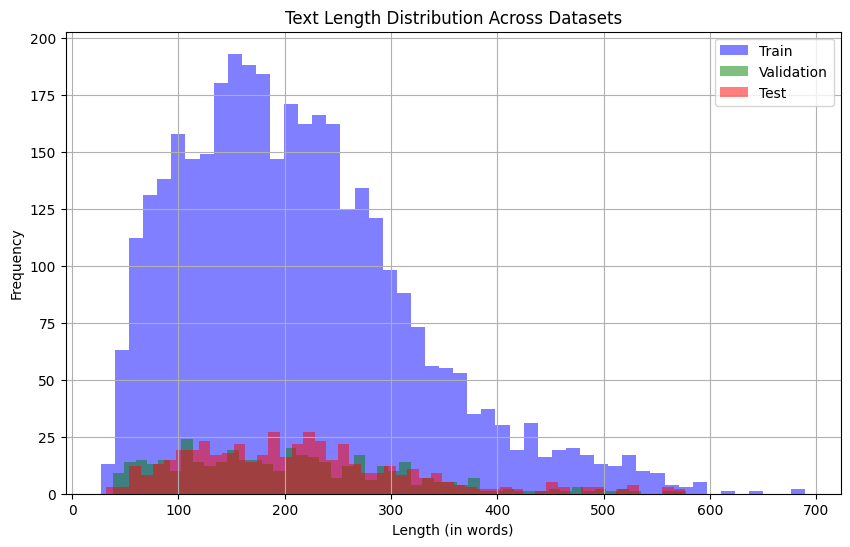

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(train_normal_lengths, bins=50, alpha=0.5, label='Train', color='blue')
plt.hist(val_normal_lengths, bins=50, alpha=0.5, label='Validation', color='green')
plt.hist(test_normal_lengths, bins=50, alpha=0.5, label='Test', color='red')

plt.title('Text Length Distribution Across Datasets')
plt.xlabel('Length (in words)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

# Check type of operations performed

Annotatate with BIC model: https://huggingface.co/Salesforce/bic_simple_edit_id

In [9]:
import sys
import os
sys.path.append(os.path.abspath('../utils'))

In [11]:
from model_bic import BIC

bic = BIC("Salesforce/bic_simple_edit_id")

In [21]:
sample = ds['train'][0]
print(sample['source'], end='\n\n')

Two trials met the inclusion criteria. One compared 2% ketanserin ointment in polyethylene glycol (PEG) with PEG alone, used twice a day by 40 participants with arterial leg ulcers, for eight weeks or until healing, whichever was sooner. One compared topical application of blood-derived concentrated growth factor (CGF) with standard dressing (polyurethane film or foam); both applied weekly for six weeks by 61 participants with non-healing ulcers (venous, diabetic arterial, neuropathic, traumatic, or vasculitic). Both trials were small, reported results inadequately, and were of low methodological quality. Short follow-up times (six and eight weeks) meant it would be difficult to capture sufficient healing events to allow us to make comparisons between treatments. One trial demonstrated accelerated wound healing in the ketanserin group compared with the control group. In the trial that compared CGF with standard dressings, the number of participants with diabetic arterial ulcers were on

In [19]:
edit_groups = bic.predict_from_text_pair(sample['source'], sample['references'][0])

In [20]:
print(edit_groups)

[{'opis': [0, 1, 2, 3, 4], 'category': 'nonsim_extraneous_information'}, {'opis': [0], 'category': 'semantic_elaboration_example'}, {'opis': [1, 2, 3, 4], 'category': 'semantic_elaboration_example'}, {'opis': [5], 'category': 'semantic_deletion'}, {'opis': [7, 8], 'category': 'lexical_generic'}, {'opis': [7], 'category': 'semantic_elaboration_example'}, {'opis': [10, 11], 'category': 'lexical_generic'}, {'opis': [13, 14], 'category': 'lexical_generic'}, {'opis': [16], 'category': 'semantic_elaboration_example'}, {'opis': [16], 'category': 'lexical_generic'}, {'opis': [17], 'category': 'semantic_deletion'}, {'opis': [19, 20, 30], 'category': 'syntactic_sentence_splitting'}, {'opis': [20, 34], 'category': 'discourse_reordering'}, {'opis': [20, 21, 22], 'category': 'nonsim_extraneous_information'}, {'opis': [20], 'category': 'semantic_elaboration_example'}, {'opis': [21, 22], 'category': 'semantic_elaboration_example'}, {'opis': [24, 25], 'category': 'semantic_deletion'}, {'opis': [27], '

In [22]:
from utils_vis import visualize_edit_groups

visualize_edit_groups(sample['source'], sample['references'][0], edit_groups)

There are a total of 40 identified groups.
[nonsim_extraneous_information ] We found two small studies that presented data for 49 participants with arterial leg ulcers(search conducted January 2019). The studies also included participants with other kinds of ulcers, and it is not clear what proportion of participants were diabetic. Neither study described the methods fully, both presented limited results for the arterial ulcer participants, and one study did not provide information on the number of participants with an arterial ulcer in the control group. The follow-up periods(six and eight weeks) were too short to measure healing. Therefore, the data that were available were incomplete and cannot be generalised to the greater population of people who suffer from arterial leg ulcers [...]
[semantic_elaboration_example  ] We found two small studies that presented data for 49 participants with arterial leg ulcers(search conducted January 2019). [...]
[semantic_elaboration_example  ] [...